# Color Extraction and Image Segmentation

In [13]:
import numpy as np
import cv2
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

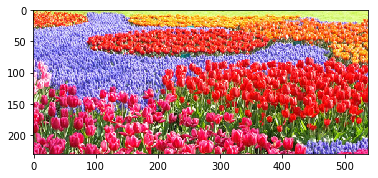

(124278, 3)


In [14]:
im = cv2.imread("tulip.jpg")
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
plt.figure()
plt.imshow(im)
plt.show()
reshaped_im = im.reshape((-1, 3))
print(reshaped_im.shape)

In [23]:
k = 5
kmeans = KMeans(k)

In [24]:
kmeans.fit(reshaped_im)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
    n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
    random_state=None, tol=0.0001, verbose=0)

In [25]:
dominant_colors = kmeans.cluster_centers_.astype('uint8')
dominant_colors

array([[220,  38,  47],
       [118, 105, 200],
       [ 90,  90,  43],
       [227, 166, 113],
       [204, 186, 235]], dtype=uint8)

In [26]:
np.zeros_like(reshaped_im).shape

(124278, 3)

In [27]:
kmeans.labels_

array([3, 3, 3, ..., 0, 0, 3])

(231, 538, 3)


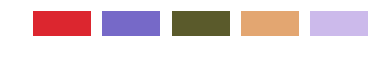

In [28]:
plt.figure()
for i,color in enumerate(dominant_colors):
    palette = np.zeros_like(im, dtype='uint8')
    palette[:,:,:] = color
    plt.subplot(1,k,i+1)
    plt.axis("off")
    plt.imshow(palette)
print(im.shape)    

In [29]:
new_img = np.zeros((im.shape[0]*im.shape[1],3),dtype='uint8')
print(new_img.shape)

(124278, 3)


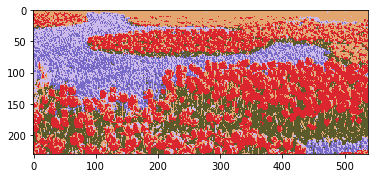

In [30]:
for ix in range(new_img.shape[0]):
    new_img[ix] = dominant_colors[kmeans.labels_[ix]]
    
new_img = new_img.reshape((im.shape))
plt.imshow(new_img)
plt.show()